# Machine Learning for Biomedical Data with Python
## Code 5.2 Logistic Regression
Realize Logistic Classification to Data Sets
We have 4 patients that cancer progress (1) and four  patients that the cancer did not progress, we are interested
to have any information that help us to figure out any clinical marker

In [3]:
from scipy import stats
import numpy as np
import pandas as pd 
import math
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

### Importing Data

Patient Age

In [5]:
x_age = np.array([12, 17, 18, 20, 22, 25, 35, 30,  44, 48, 50, 52, 55, 48, 65]).reshape(-1, 1)  
x_age

array([[12],
       [17],
       [18],
       [20],
       [22],
       [25],
       [35],
       [30],
       [44],
       [48],
       [50],
       [52],
       [55],
       [48],
       [65]])

Patient Weight

In [6]:
x_weight = np.array([60, 62, 55, 60, 50, 80, 75, 70, 74, 75, 80, 60, 70, 60, 60])
x_weight = x_weight.reshape(-1, 1)

Target --> Disease Progresion

In [16]:
y = np.array([0, 0, 0, 0, 0, 0, 0, 0,  1,  1, 1, 1, 1, 1, 1])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

## Logistic Model

In [124]:
#model = LogisticRegression(solver='liblinear', random_state=0)
model = LogisticRegression(C=1.0, solver='lbfgs', multi_class='ovr')
model1 = LogisticRegression(C=1.0, solver='lbfgs', multi_class='ovr')

### Testing the Age

Spliting the data

In [125]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_age, y, test_size=0.3, random_state=5)

In [126]:
model.fit(x_train, y_train)
model.score(x_train, y_train)

1.0

In [128]:
model.intercept_

array([-24.28521021])

In [129]:
model.coef_

array([[0.61711452]])

Plotting

Text(0,0.5,'Age')

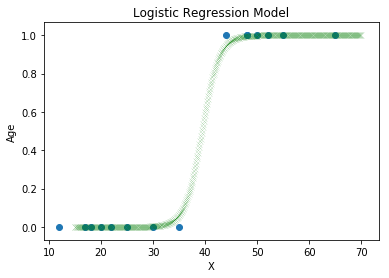

In [127]:
X = np.arange(15, 70, 0.1)
X = X.reshape(-1, 1)
plt.scatter(x_age, y)
plt.scatter(X,model.predict_proba(X)[:,1],marker='x',color='g',linewidth=.1)
plt.title("Logistic Regression Model")
plt.xlabel('X')
plt.ylabel('Age')

### Testing the Weight

In [130]:
x_train, x_test, y_train, y_test = train_test_split(x_weight, y, test_size=0.3, random_state=5)

In [131]:
model1.fit(x_train, y_train)
model1.score(x_train, y_train)

0.7

Text(0,0.5,'Age')

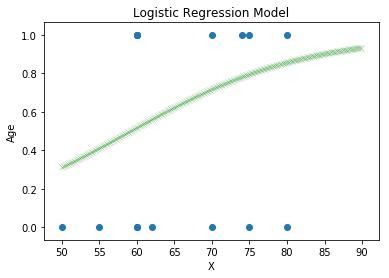

In [133]:
X = np.arange(50, 90, 0.1)
X = X.reshape(-1, 1)
plt.scatter(x_weight, y)
plt.scatter(X,model1.predict_proba(X)[:,1],marker='x',color='g',linewidth=.1)
plt.title("Logistic Regression Model")
plt.xlabel('X')
plt.ylabel('Age')

## Confusion Matrix

Age Marker

In [136]:
cm = confusion_matrix(y, model.predict(x_age))

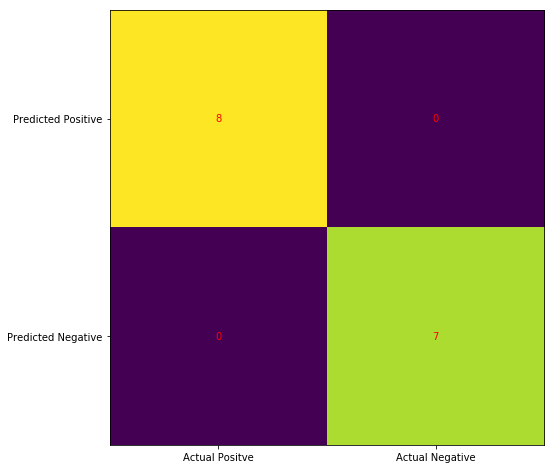

In [140]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.yaxis.set(ticks=(0, 1), ticklabels=('Predicted Positive', 'Predicted Negative'))
ax.xaxis.set(ticks=(0, 1), ticklabels=('Actual Positve', 'Actual Negative'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

Weight Marker

In [144]:
cm = confusion_matrix(y, model1.predict(x_weight))

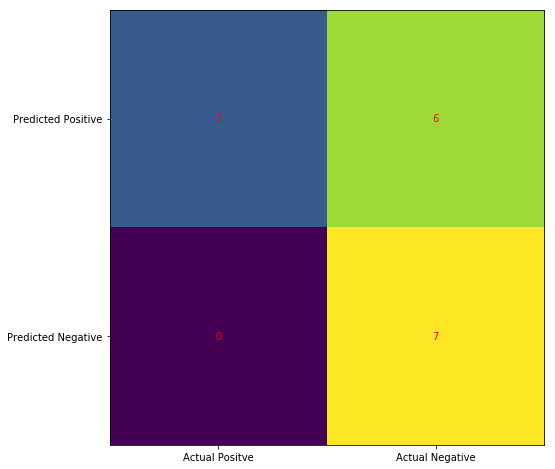

In [145]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.yaxis.set(ticks=(0, 1), ticklabels=('Predicted Positive', 'Predicted Negative'))
ax.xaxis.set(ticks=(0, 1), ticklabels=('Actual Positve', 'Actual Negative'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

## ROC

Age Marker

In [151]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [173]:
# Genrate a Diagonal(Random Guess)
ns_probs = [0 for _ in range(len(y))]

In [162]:
# predict probabilities
lr_probs = model.predict_proba(x_age)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y, ns_probs)
lr_auc = roc_auc_score(y, lr_probs)

In [168]:
# summarize scores
print('ROC AUC for Logistic Model =%.3f' % (lr_auc))

ROC AUC for Logistic Model =0.616


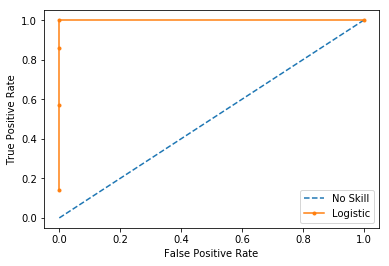

In [164]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Weight Marker

In [170]:
# predict probabilities
lr_probs = model1.predict_proba(x_weight)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y, ns_probs)
lr_auc = roc_auc_score(y, lr_probs)

In [171]:
print('ROC AUC for Logistic Model =%.3f' % (lr_auc))

ROC AUC for Logistic Model =0.616


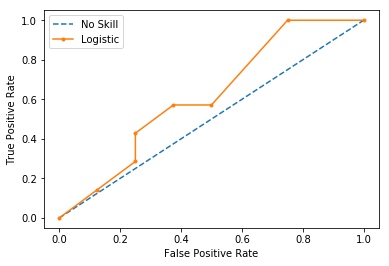

In [172]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()